## Practical No. 7
### Name: Janhavi Kulkarni
### Roll No.: B-11
### Aim : 
#### A shopkeeper keeps records of his customers like age, gender, and annual income. Now, he wants to enhance his business by offering attractive deals. How should the shopkeeper provide these offers to his customers. Create machine learning model using Kmeans algorithm and help shopkeeper to identify group of customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Import Dataset

In [6]:
import pandas as pd

# Load the data
data = pd.read_csv(r"C:\\Users\\CSE\\Desktop\\B_11ML\\shop.csv")

# Display the first few rows of the dataset
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


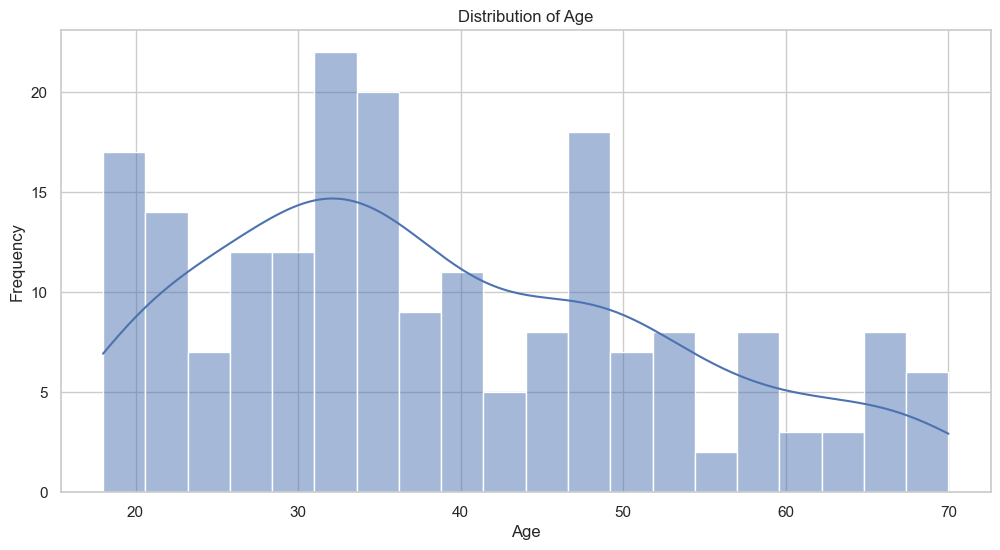

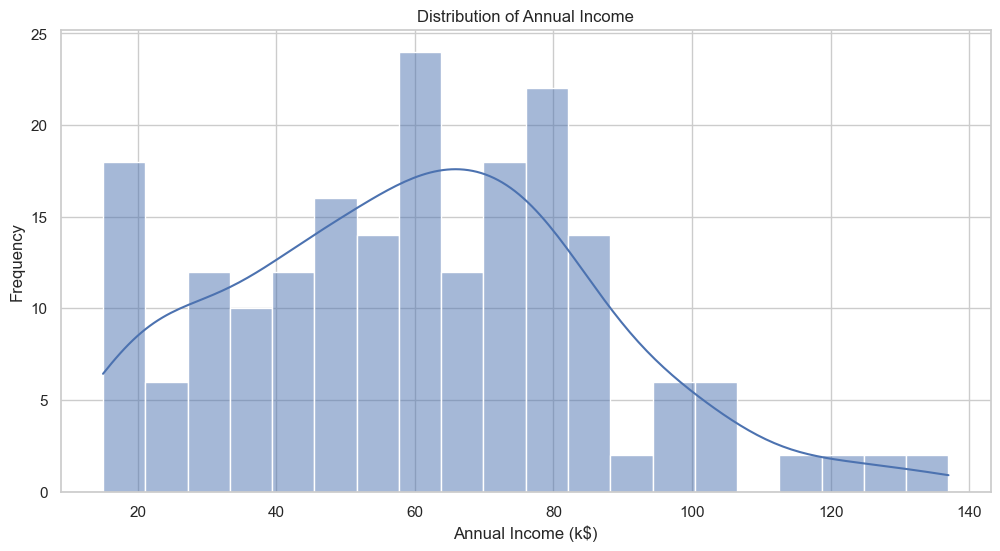

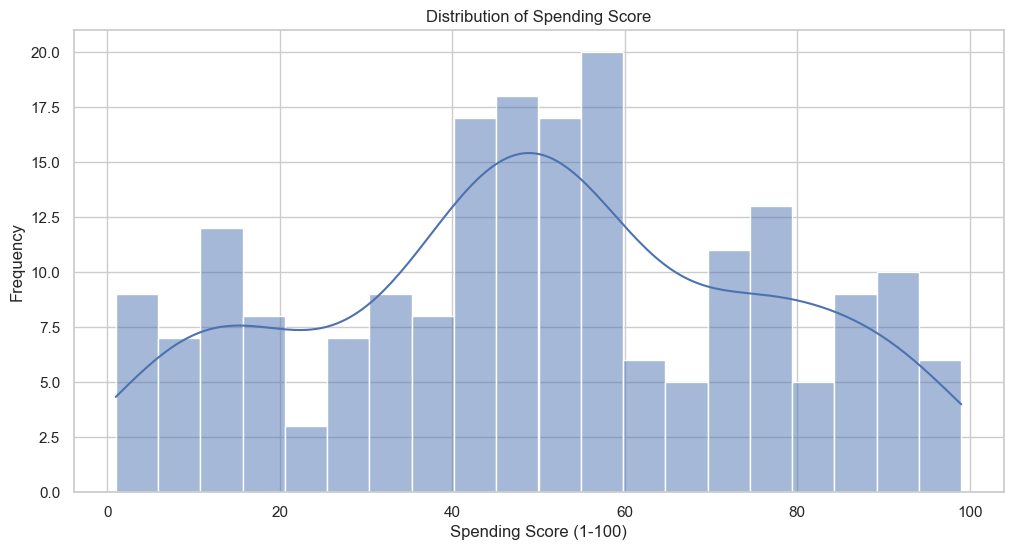

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style='whitegrid')

# Plot distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Annual Income
plt.figure(figsize=(12, 6))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Spending Score
plt.figure(figsize=(12, 6))
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

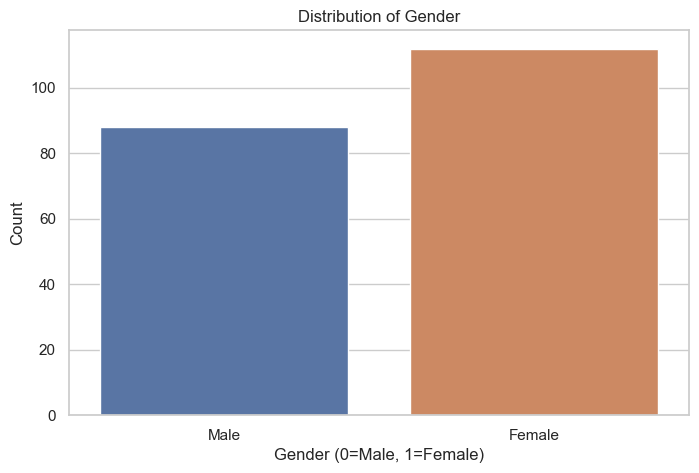

In [11]:
# Countplot for Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Genre', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

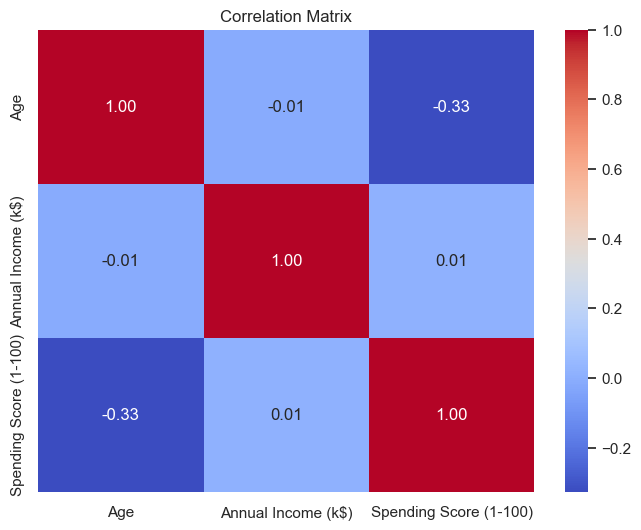

In [12]:
# Correlation matrix
correlation_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

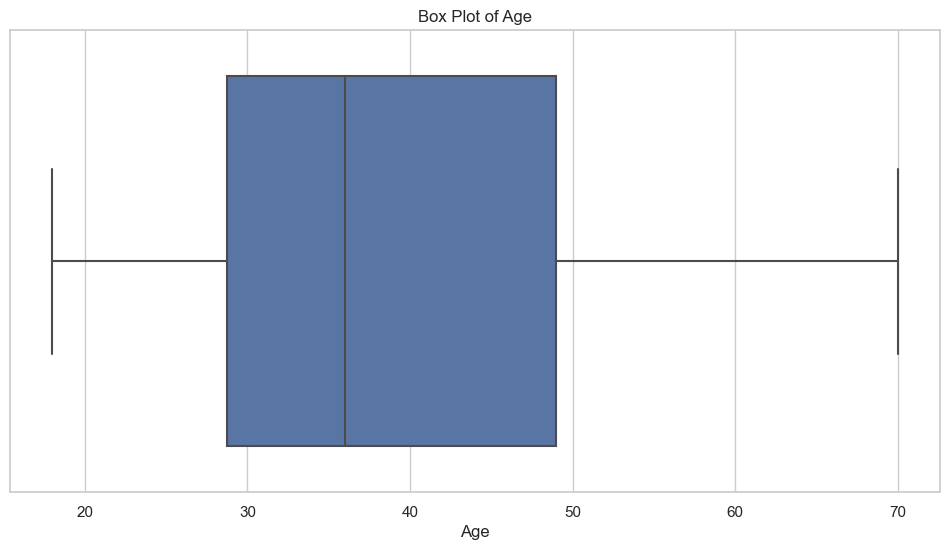

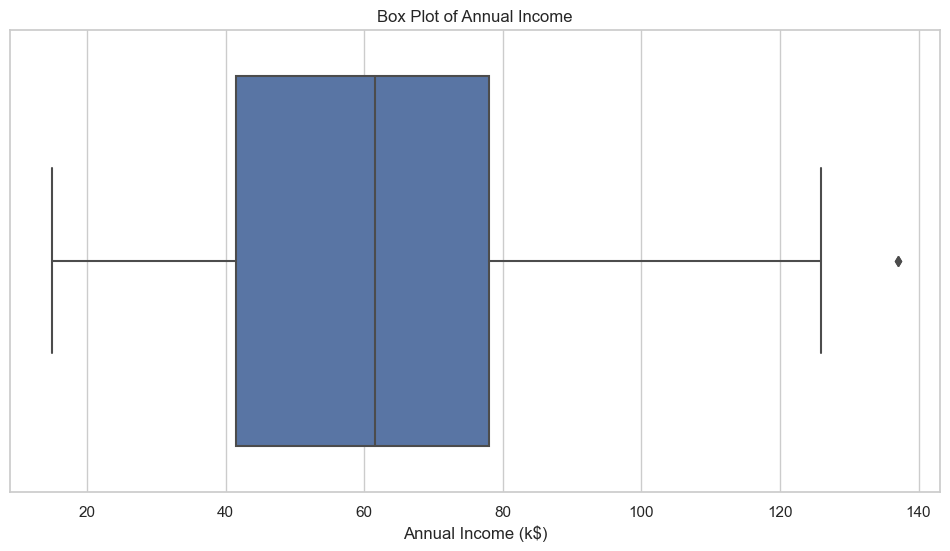

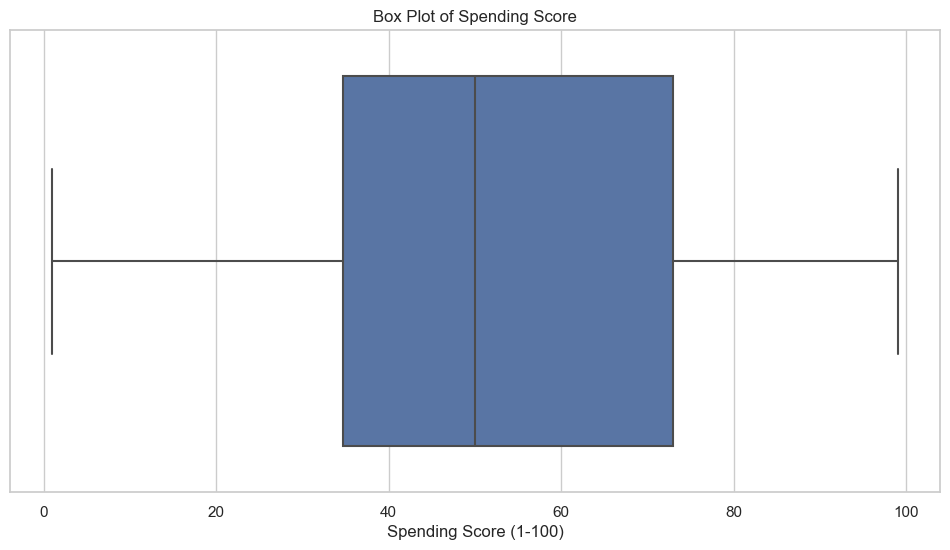

In [13]:
# Box plot for Age
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Box plot for Annual Income
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.show()

# Box plot for Spending Score
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Spending Score (1-100)'])
plt.title('Box Plot of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.show()

In [22]:
print(data.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


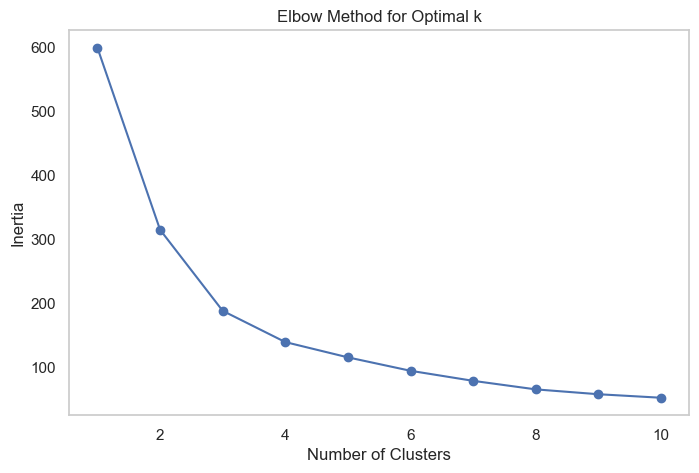

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Check the columns in your DataFrame
print(data.columns)  # Check column names

# Select the feature columns using correct names
features = data[['CustomerID', 'Age', 'Annual Income (k$)']]  # Replace with actual names

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Determining the Optimal Number of Clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, max_iter=300, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


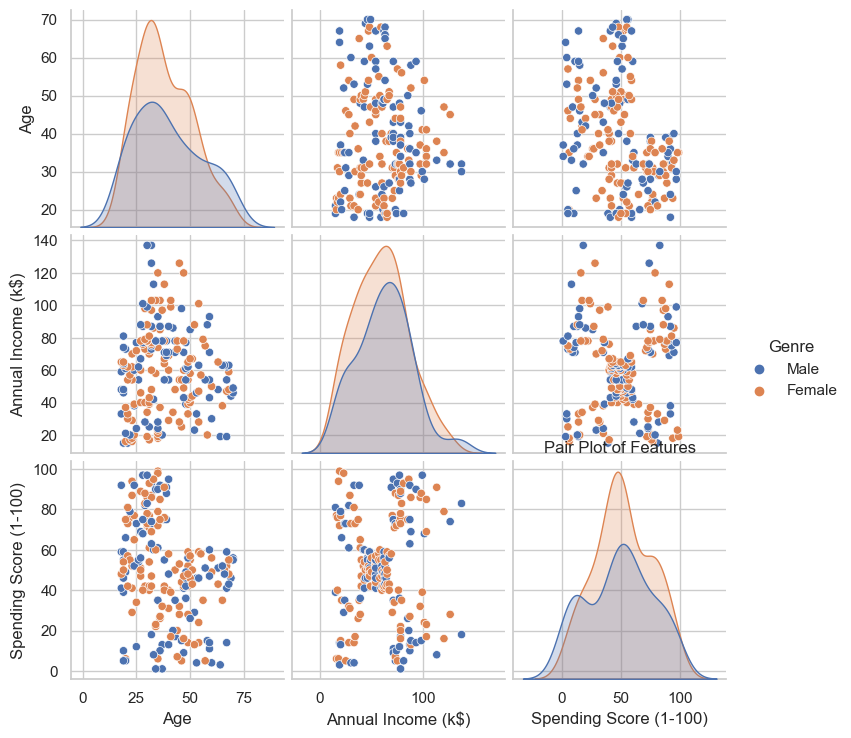

In [26]:
# Pair plot to see relationships between features
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre']], hue='Genre')
plt.title('Pair Plot of Features')
plt.show()

In [28]:
print(data.columns)


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [63]:
from sklearn.cluster import KMeans

# Assuming you have already scaled your features and chosen the number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)  # Replace 3 with your chosen number of clusters
data['Cluster'] = kmeans.fit_predict(scaled_features)  # Make sure to replace `scaled_features` with your actual data


C:\Users\CSE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


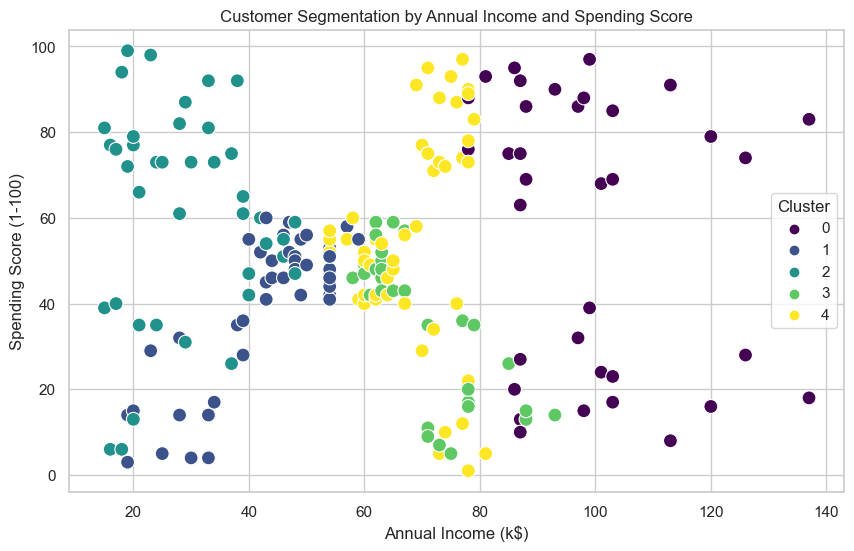

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [50]:
# Step 6: Applying K-means Clustering

# Choose the number of clusters based on the elbow method
k = 5 # Assume we determined 3 is optimal from the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
data['Cluster'] = clusters

In [51]:
# Group by clusters and calculate the mean for each numeric feature
cluster_analysis = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_analysis)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        35.777778           98.805556               55.916667
1        55.142857           42.452381               39.238095
2        27.166667           29.595238               60.809524
3        53.233333           70.300000               34.900000
4        28.560000           68.400000               55.560000


In [52]:
print(data.dtypes)


CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Cluster                    int32
dtype: object


In [53]:
data['Annual Income (k$)'] = pd.to_numeric(data['Annual Income (k$)'], errors='coerce')
data['Spending Score (1-100)'] = pd.to_numeric(data['Spending Score (1-100)'], errors='coerce')

In [54]:
# Step 7: Analyzing the Clusters

# Group by clusters and calculate the mean for numeric features
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cluster_analysis_numeric = data.groupby('Cluster')[numeric_columns].mean()

# For categorical data, we can use the mode (most frequent value)
cluster_analysis_genre = data.groupby('Cluster')['Genre'].agg(lambda x: x.mode()[0])

# Combine the two analyses into a single DataFrame
cluster_analysis = cluster_analysis_numeric.join(cluster_analysis_genre)

print(cluster_analysis)


               Age  Annual Income (k$)  Spending Score (1-100)   Genre
Cluster                                                               
0        35.777778           98.805556               55.916667  Female
1        55.142857           42.452381               39.238095  Female
2        27.166667           29.595238               60.809524  Female
3        53.233333           70.300000               34.900000    Male
4        28.560000           68.400000               55.560000  Female


In [55]:
# Step 8: Interpreting the Clusters
# View the cluster analysis you already performed
print(cluster_analysis)

# Identify unique characteristics of each cluster
for cluster_id in range(cluster_analysis.shape[0]):
    print(f"\nCluster {cluster_id}:")
    print(f" - Age: {cluster_analysis.loc[cluster_id, 'Age']}")
    print(f" - Gender (mean): {cluster_analysis.loc[cluster_id, 'Genre']}")
    print(f" - Annual Income: {cluster_analysis.loc[cluster_id, 'Annual Income (k$)']}")
    print(f" - Spending Score: {cluster_analysis.loc[cluster_id, 'Spending Score (1-100)']}")

               Age  Annual Income (k$)  Spending Score (1-100)   Genre
Cluster                                                               
0        35.777778           98.805556               55.916667  Female
1        55.142857           42.452381               39.238095  Female
2        27.166667           29.595238               60.809524  Female
3        53.233333           70.300000               34.900000    Male
4        28.560000           68.400000               55.560000  Female

Cluster 0:
 - Age: 35.77777777777778
 - Gender (mean): Female
 - Annual Income: 98.80555555555556
 - Spending Score: 55.916666666666664

Cluster 1:
 - Age: 55.142857142857146
 - Gender (mean): Female
 - Annual Income: 42.45238095238095
 - Spending Score: 39.23809523809524

Cluster 2:
 - Age: 27.166666666666668
 - Gender (mean): Female
 - Annual Income: 29.595238095238095
 - Spending Score: 60.80952380952381

Cluster 3:
 - Age: 53.233333333333334
 - Gender (mean): Male
 - Annual Income: 70.3
 - Spe

In [56]:
# Step 9: Developing Targeted Marketing Strategies

# Display cluster characteristics
for cluster_id in range(cluster_analysis.shape[0]):
    print(f"\nCluster {cluster_id} Characteristics:")
    print(f" - Average Age: {cluster_analysis.loc[cluster_id, 'Age']}")
    print(f" - Average Gender (0=Male, 1=Female): {cluster_analysis.loc[cluster_id, 'Genre']}")
    print(f" - Average Annual Income: ${cluster_analysis.loc[cluster_id, 'Annual Income (k$)'] * 1000}")
    print(f" - Average Spending Score: {cluster_analysis.loc[cluster_id, 'Spending Score (1-100)']}")


Cluster 0 Characteristics:
 - Average Age: 35.77777777777778
 - Average Gender (0=Male, 1=Female): Female
 - Average Annual Income: $98805.55555555556
 - Average Spending Score: 55.916666666666664

Cluster 1 Characteristics:
 - Average Age: 55.142857142857146
 - Average Gender (0=Male, 1=Female): Female
 - Average Annual Income: $42452.38095238095
 - Average Spending Score: 39.23809523809524

Cluster 2 Characteristics:
 - Average Age: 27.166666666666668
 - Average Gender (0=Male, 1=Female): Female
 - Average Annual Income: $29595.238095238095
 - Average Spending Score: 60.80952380952381

Cluster 3 Characteristics:
 - Average Age: 53.233333333333334
 - Average Gender (0=Male, 1=Female): Male
 - Average Annual Income: $70300.0
 - Average Spending Score: 34.9

Cluster 4 Characteristics:
 - Average Age: 28.56
 - Average Gender (0=Male, 1=Female): Female
 - Average Annual Income: $68400.0
 - Average Spending Score: 55.56


In [57]:
# Define marketing strategies based on cluster analysis
marketing_strategies = {
    0: "Offer discounts on budget-friendly products, loyalty programs for frequent buyers.",
    1: "Provide special deals on mid-range products, exclusive access to new arrivals.",
    2: "Introduce premium product discounts, personalized shopping experiences, or exclusive member-only events."
}

# Display the strategies
for cluster_id, strategy in marketing_strategies.items():
    print(f"\nCluster {cluster_id} Marketing Strategy: {strategy}")


Cluster 0 Marketing Strategy: Offer discounts on budget-friendly products, loyalty programs for frequent buyers.

Cluster 1 Marketing Strategy: Provide special deals on mid-range products, exclusive access to new arrivals.

Cluster 2 Marketing Strategy: Introduce premium product discounts, personalized shopping experiences, or exclusive member-only events.


In [61]:
import pandas as pd

# Example: Creating the DataFrame manually with 5 clusters
post_campaign_data = pd.DataFrame({
    'Cluster': [1, 1, 2, 2, 3, 4, 4, 5, 5],
    'Sales': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'Engagement Rate': [0.8, 0.85, 0.9, 0.75, 0.95, 0.88, 0.92, 0.87, 0.91]
})

# Calculate total sales and average engagement rate by cluster
evaluation = post_campaign_data.groupby('Cluster').agg({
    'Sales': 'sum',
    'Engagement Rate': 'mean'
}).reset_index()

print("\nCampaign Effectiveness Evaluation:")
print(evaluation)


Campaign Effectiveness Evaluation:
   Cluster  Sales  Engagement Rate
0        1    250            0.825
1        2    450            0.825
2        3    300            0.950
3        4    750            0.900
4        5    950            0.890
